pt TAU
pt ELECTRON
----
3398
12311
10601
39652
----
pt MUON
 invariant mass of muon and electron 


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:161: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:166: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:168: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:177: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:179: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.p

 invariant mass of muon and tau 


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:387: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:392: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:394: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:403: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:405: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:407: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.p

 invariant mass of electron and tau 
 invariant mass of electron and tau and muon 


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:541: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:546: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:548: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:557: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:559: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:561: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.p

 dr of muon and tau 


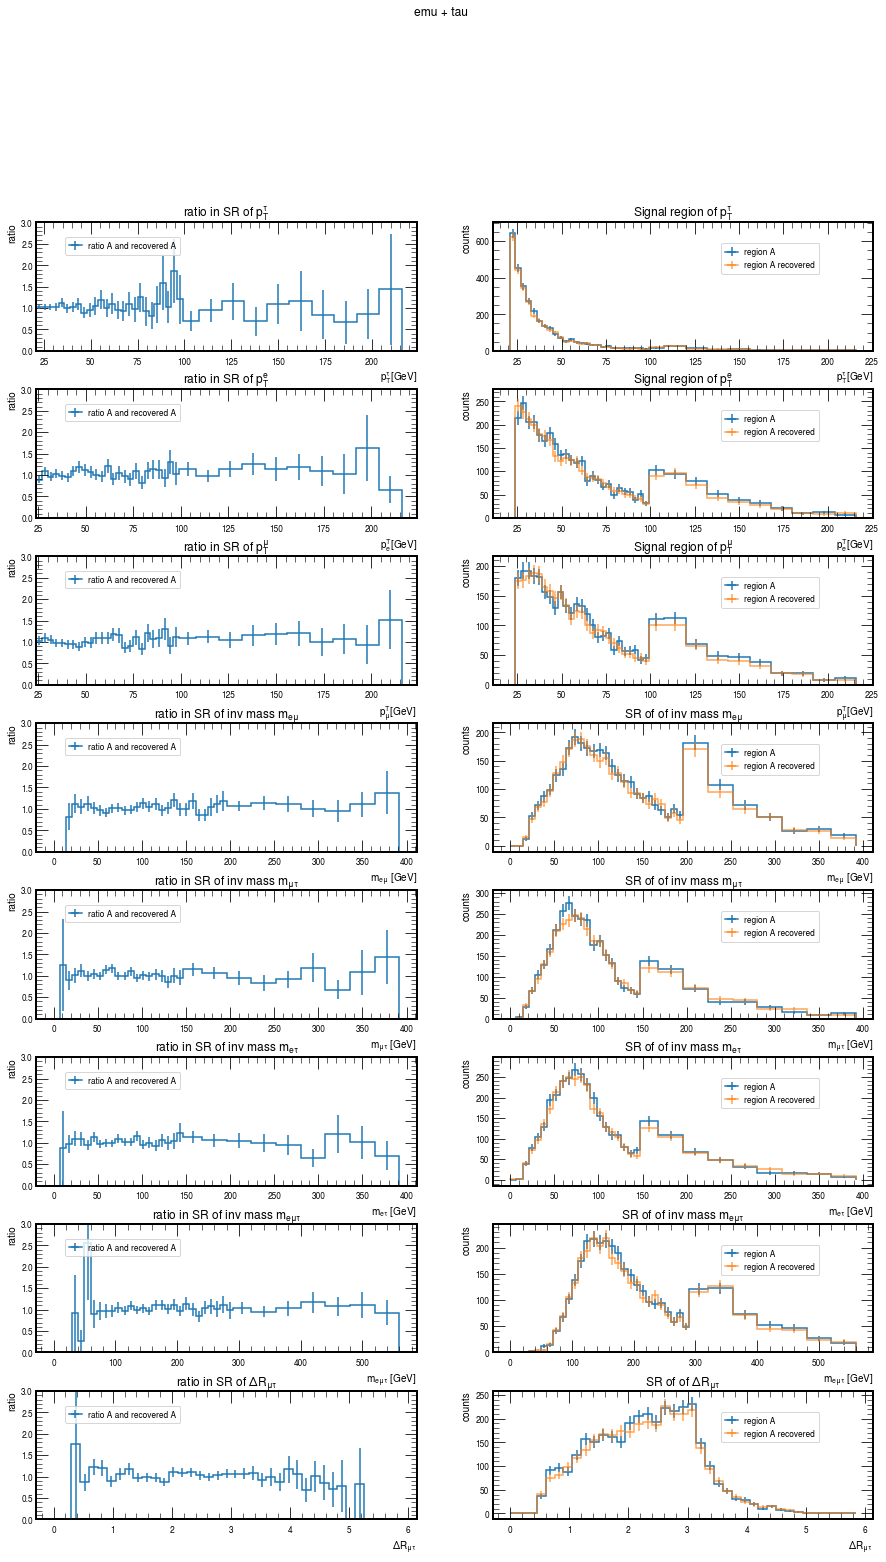

In [74]:
###FOR TTBAR BACKGROUND
####FOR EMU + TAU
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT])
%matplotlib inline
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu"

samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
file = samples[0][0]
events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)        
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, muon3 = ak.unzip(ak.cartesian([events.SelTau, events.SelMuon], nested=True))
match3 = ak.any(tau3.jetIdx == muon3.jetIdx, axis=-1, mask_identity=False)
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  

events = events[ak.num(events.SelMuon) == 1]
events = events[ak.num(events.SelElectron) == 1]
jets = events.Jet[events.Jet.pt > 25.]
bjets = jets[jets.btagDeepFlavB > 0.2770]
one_bjet = ak.num(bjets) == 1
no_bjet = ak.num(bjets) == 0

region_C = events[no_bjet] # no bjet and loose tau ID selection
region_D = events[one_bjet] # one bjet and loose tau ID selection
region_A = events[no_bjet] # no bjet and loose tau ID selection
region_B = events[one_bjet] # one bjet and loose tau ID selection

region_A['SelTau'] = region_A.SelTau[region_A.SelTau.idDeepTau2017v2p1VSjet >= 63]
region_B['SelTau'] = region_B.SelTau[region_B.SelTau.idDeepTau2017v2p1VSjet >= 63]


region_A = region_A[ak.num(region_A.SelTau) >= 1] # no bjet and medium tau ID selection
region_B = region_B[ak.num(region_B.SelTau) >= 1] # one bjet and medium tau ID selection
region_C = region_C[ak.num(region_C.SelTau) >= 1] # no bjet and medium tau ID selection
region_D = region_D[ak.num(region_D.SelTau) >= 1] # one bjet and medium tau ID selection

################pT Tau####################################
print("pt TAU")
pt_A = region_A.SelTau[:,0].pt
pt_B = region_B.SelTau[:,0].pt
pt_C = region_C.SelTau[:,0].pt
pt_D = region_D.SelTau[:,0].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])


nb_row = 10
width = 15
plot_iter = 1
height = nb_row*3
plt.figure(figsize=(width, height))
plt.suptitle("emu + tau")
ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)

hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax1.legend(loc=(0.075,0.75),frameon=True)
ax1.set_ylabel("ratio")
ax1.set_xlabel(r"$p_T^{\tau}$[GeV]")
ax1.set_title(r"ratio in SR of $p_T^{\tau}$")
ax1.set_ylim([0, 3])
ax1.set_xlim([21, 224])

ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)
hep.histplot(h_A, bins, yerr = error_A, label = 'region A')
hep.histplot(h_recovered_A, bins, yerr = error_recovered_A, label = 'region A recovered', alpha = 0.7)
ax1.legend(loc=(0.6,0.6),frameon=True)
ax1.set_ylabel("counts")
ax1.set_xlabel(r"$p_T^{\tau}$[GeV]")
ax1.set_title(r"Signal region of $p_T^{\tau}$")



################pT ELECTRON####################################
print("pt ELECTRON")
pt_A = region_A.SelElectron[:,0].pt
pt_B = region_B.SelElectron[:,0].pt
pt_C = region_C.SelElectron[:,0].pt
pt_D = region_D.SelElectron[:,0].pt
print("----")
print(len(pt_A))
print(len(pt_B))
print(len(pt_C))
print(len(pt_D))
print("----")
bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax2 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')

ax2.legend(loc=(0.075,0.75),frameon=True)
ax2.set_ylabel("ratio")
ax2.set_ylim([0, 3])
ax2.set_xlim([24, 224])
ax2.set_xlabel(r"$p^T_{e}$[GeV]")
ax2.set_title(r"ratio in SR of $p_T^{e}$")


ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)
hep.histplot(h_A, bins, yerr = error_A, label = 'region A')
hep.histplot(h_recovered_A, bins, yerr = error_recovered_A, label = 'region A recovered', alpha = 0.7)
ax1.legend(loc=(0.6,0.6),frameon=True)
ax1.set_ylabel("counts")
ax1.set_xlabel(r"$p^T_{e}$[GeV]")
ax1.set_title(r"Signal region of $p_T^{e}$")


################pT MUON####################################
print("pt MUON")
pt_A = region_A.SelMuon[:,0].pt
pt_B = region_B.SelMuon[:,0].pt
pt_C = region_C.SelMuon[:,0].pt
pt_D = region_D.SelMuon[:,0].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_ylim([0, 3])
ax3.set_xlim([24, 224])
ax3.set_xlabel(r"$p^T_{\mu}$[GeV]")
ax3.set_title(r"ratio in SR of $p_T^{\mu}$")

ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)
hep.histplot(h_A, bins, yerr = error_A, label = 'region A')
hep.histplot(h_recovered_A, bins, yerr = error_recovered_A, label = 'region A recovered', alpha = 0.7)
ax1.legend(loc=(0.6,0.6),frameon=True)
ax1.set_ylabel("counts")
ax1.set_xlabel(r"$p^T_{\mu}$[GeV]")
ax1.set_title(r"Signal region of $p_T^{\mu}$")



################ invariant mass of muon and electron ####################################
print(" invariant mass of muon and electron ")
pt_A = (region_A.SelElectron[:,0]+region_A.SelMuon[:,0]).mass
pt_B = (region_B.SelElectron[:,0]+region_B.SelMuon[:,0]).mass
pt_C = (region_C.SelElectron[:,0]+region_C.SelMuon[:,0]).mass
pt_D = (region_D.SelElectron[:,0]+region_D.SelMuon[:,0]).mass


bins = []
width = 7
for i in range(0,200):
    if(i%width == 0):
        bins.append(i)
for i in range(200,400):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel(r'$m_{e \mu}$ [GeV]')
ax3.set_ylim([0, 3])
#ax3.set_xlim([24, 224])
ax3.set_title(r"ratio in SR of inv mass $m_{e\mu}$")

ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)
hep.histplot(h_A, bins, yerr = error_A, label = 'region A')
hep.histplot(h_recovered_A, bins, yerr = error_recovered_A, label = 'region A recovered', alpha = 0.7)
ax1.legend(loc=(0.6,0.6),frameon=True)
ax1.set_ylabel("counts")
ax1.set_xlabel(r'$m_{e \mu}$ [GeV]')
ax1.set_title(r"SR of of inv mass $m_{e\mu}$")



################ invariant mass of muon and tau ####################################
print(" invariant mass of muon and tau ")
pt_A = (region_A.SelTau[:,0]+region_A.SelMuon[:,0]).mass
pt_B = (region_B.SelTau[:,0]+region_B.SelMuon[:,0]).mass
pt_C = (region_C.SelTau[:,0]+region_C.SelMuon[:,0]).mass
pt_D = (region_D.SelTau[:,0]+region_D.SelMuon[:,0]).mass


bins = []
width = 7
for i in range(0,150):
    if(i%width == 0):
        bins.append(i)
for i in range(150,400):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel(r'$m_{\mu \tau}$ [GeV]')
ax3.set_ylim([0, 3])
#ax3.set_xlim([24, 224])
ax3.set_title(r"ratio in SR of inv mass $m_{\mu \tau}$")

ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)
hep.histplot(h_A, bins, yerr = error_A, label = 'region A')
hep.histplot(h_recovered_A, bins, yerr = error_recovered_A, label = 'region A recovered', alpha = 0.7)
ax1.legend(loc=(0.6,0.6),frameon=True)
ax1.set_ylabel("counts")
ax1.set_xlabel(r'$m_{\mu \tau}$ [GeV]')
ax1.set_title(r"SR of of inv mass $m_{\mu \tau}$")






################ invariant mass of electron and tau ####################################
print(" invariant mass of electron and tau ")
pt_A = (region_A.SelTau[:,0]+region_A.SelElectron[:,0]).mass
pt_B = (region_B.SelTau[:,0]+region_B.SelElectron[:,0]).mass
pt_C = (region_C.SelTau[:,0]+region_C.SelElectron[:,0]).mass
pt_D = (region_D.SelTau[:,0]+region_D.SelElectron[:,0]).mass


bins = []
width = 7
for i in range(0,150):
    if(i%width == 0):
        bins.append(i)
for i in range(150,400):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel(r'$m_{e \tau}$ [GeV]')
ax3.set_ylim([0, 3])
#ax3.set_xlim([24, 224])
ax3.set_title(r"ratio in SR of inv mass $m_{e \tau}$")

ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)
hep.histplot(h_A, bins, yerr = error_A, label = 'region A')
hep.histplot(h_recovered_A, bins, yerr = error_recovered_A, label = 'region A recovered', alpha = 0.7)
ax1.legend(loc=(0.6,0.6),frameon=True)
ax1.set_ylabel("counts")
ax1.set_xlabel(r'$m_{e \tau}$ [GeV]')
ax1.set_title(r"SR of of inv mass $m_{e \tau}$")




################ invariant mass of 3 leptons ####################################
print(" invariant mass of electron and tau and muon ")
pt_A = (region_A.SelTau[:,0]+region_A.SelElectron[:,0]+region_A.SelMuon[:,0]).mass
pt_B = (region_B.SelTau[:,0]+region_B.SelElectron[:,0]+region_B.SelMuon[:,0]).mass
pt_C = (region_C.SelTau[:,0]+region_C.SelElectron[:,0]+region_C.SelMuon[:,0]).mass
pt_D = (region_D.SelTau[:,0]+region_D.SelElectron[:,0]+region_D.SelMuon[:,0]).mass


bins = []
width = 10
for i in range(0,300):
    if(i%width == 0):
        bins.append(i)
for i in range(300,600):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel(r'$m_{e  \mu\tau}$ [GeV]')
ax3.set_ylim([0, 3])
#ax3.set_xlim([24, 224])
ax3.set_title(r"ratio in SR of inv mass $m_{e  \mu\tau}$")

ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)
hep.histplot(h_A, bins, yerr = error_A, label = 'region A')
hep.histplot(h_recovered_A, bins, yerr = error_recovered_A, label = 'region A recovered', alpha = 0.7)
ax1.legend(loc=(0.6,0.6),frameon=True)
ax1.set_ylabel("counts")
ax1.set_xlabel(r'$m_{e  \mu\tau}$ [GeV]')
ax1.set_title(r"SR of of inv mass $m_{e  \mu\tau}$")



################ dr  of muon and tau ####################################
print(" dr of muon and tau ")
pt_A = delta_r(region_A.SelTau[:,0],region_A.SelMuon[:,0])
pt_B = delta_r(region_B.SelTau[:,0],region_B.SelMuon[:,0])
pt_C = delta_r(region_C.SelTau[:,0],region_C.SelMuon[:,0])
pt_D = delta_r(region_D.SelTau[:,0],region_D.SelMuon[:,0])


bins = []
width = 1.5
for i in range(0,int(45/width)):
    # if(i%width == 0):
        bins.append(width*i/10)
# for i in range(150,400):
#     if(i%(width*4) == 0):
#         bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel(r'$\Delta R_{\mu \tau}$')
ax3.set_ylim([0, 3])
#ax3.set_xlim([24, 224])
ax3.set_title(r"ratio in SR of $\Delta R_{\mu \tau}$")

ax1 = plt.subplot(nb_row,2,plot_iter)
plot_iter = plot_iter + 1
plt.subplots_adjust(hspace = 0.3)
hep.histplot(h_A, bins, yerr = error_A, label = 'region A')
hep.histplot(h_recovered_A, bins, yerr = error_recovered_A, label = 'region A recovered', alpha = 0.7)
ax1.legend(loc=(0.6,0.6),frameon=True)
ax1.set_ylabel("counts")
ax1.set_xlabel(r'$\Delta R_{\mu \tau}$ ')
ax1.set_title(r"SR of of $\Delta R_{\mu \tau}$")








plt.savefig("ratio_ABCD_ttbar_emu_tau.pdf")
plt.show()


FOR E or MU TAU + TAU

C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


[<event 1:39113:39112648>, <event 1:52256:52255835>, ... <event 1:134936:134935222>]
[<event 1:39114:39113259>, <event 1:40614:40613207>, ... <event 1:137463:137462905>]
[<event 1:39113:39112648>, <event 1:52256:52255835>, ... <event 1:136681:136680538>]
[<event 1:13094:13093602>, ... <event 1:137578:137577034>]
highest pt TAU
lowest pt Tau
pt ELECTRON (or MUON)


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:149: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:156: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:165: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launch

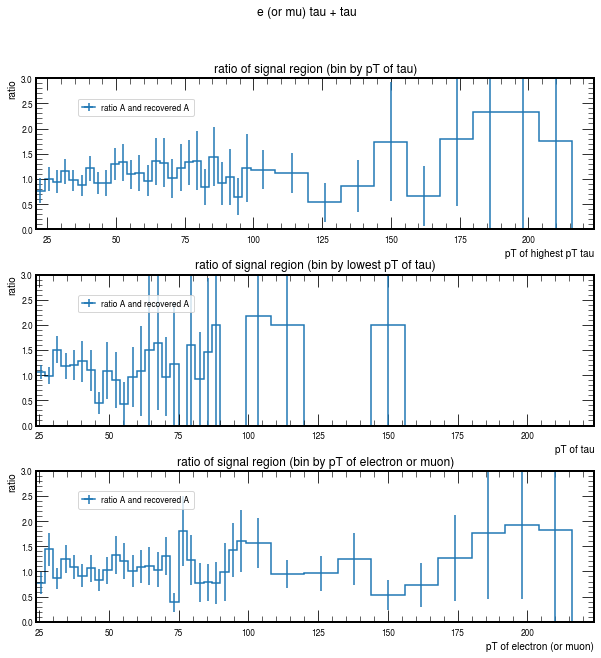

In [2]:
###FOR TTBAR BACKGROUND
####FOR ETAU + TAU
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT])
%matplotlib inline
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu"

samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
file = samples[0][0]
events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)        
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, muon3 = ak.unzip(ak.cartesian([events.SelTau, events.SelMuon], nested=True))
match3 = ak.any(tau3.jetIdx == muon3.jetIdx, axis=-1, mask_identity=False)
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  

events = events[ak.num(events.SelMuon) + ak.num(events.SelElectron) == 1]
#events = events[ak.num(events.SelElectron) == 1]
jets = events.Jet[events.Jet.pt > 25.]
bjets = jets[jets.btagDeepFlavB > 0.2770]
one_bjet = ak.num(bjets) == 1
no_bjet = ak.num(bjets) == 0

region_C = events[no_bjet] # no bjet and loose tau ID selection
region_D = events[one_bjet] # one bjet and loose tau ID selection
region_A = events[no_bjet] # no bjet and loose tau ID selection
region_B = events[one_bjet] # one bjet and loose tau ID selection

region_A['SelTau'] = region_A.SelTau[region_A.SelTau.idDeepTau2017v2p1VSjet >= 63]
region_B['SelTau'] = region_B.SelTau[region_B.SelTau.idDeepTau2017v2p1VSjet >= 63]


region_A = region_A[ak.num(region_A.SelTau) >= 2] # no bjet and medium tau ID selection
region_B = region_B[ak.num(region_B.SelTau) >= 2] # one bjet and medium tau ID selection
region_C = region_C[ak.num(region_C.SelTau) >= 2] # no bjet and medium tau ID selection
region_D = region_D[ak.num(region_D.SelTau) >= 2] # one bjet and medium tau ID selection
print(region_A)
print(region_B)
print(region_C)
print(region_D)

################pT Tau####################################
print("highest pt TAU")
pt_A = region_A.SelTau[:,0].pt
pt_B = region_B.SelTau[:,0].pt
pt_C = region_C.SelTau[:,0].pt
pt_D = region_D.SelTau[:,0].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])



plt.figure(figsize=(10,10))
plt.suptitle("e (or mu) tau + tau")
ax1 = plt.subplot(3,1,1)
plt.subplots_adjust(hspace = 0.3)

hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax1.legend(loc=(0.075,0.75),frameon=True)
ax1.set_ylabel("ratio")
ax1.set_xlabel("pT of highest pT tau")
ax1.set_title("ratio of signal region (bin by pT of tau)")
ax1.set_ylim([0, 3])
ax1.set_xlim([21, 224])





################pT Tau####################################
print("lowest pt Tau")
pt_A = region_A.SelTau[:,1].pt
pt_B = region_B.SelTau[:,1].pt
pt_C = region_C.SelTau[:,1].pt
pt_D = region_D.SelTau[:,1].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(3,1,2)
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel("pT of tau")
ax3.set_ylim([0, 3])
ax3.set_xlim([24, 224])
ax3.set_title("ratio of signal region (bin by lowest pT of tau)")




################pT ELECTRON or muon####################################
print("pt ELECTRON (or MUON)")
region_A["SelLepton"] = ak.concatenate([region_A.SelElectron, region_A.SelMuon], axis = -1)
region_B["SelLepton"] = ak.concatenate([region_B.SelElectron, region_B.SelMuon], axis = -1)
region_C["SelLepton"] = ak.concatenate([region_C.SelElectron, region_C.SelMuon], axis = -1)
region_D["SelLepton"] = ak.concatenate([region_D.SelElectron, region_D.SelMuon], axis = -1)

pt_A = region_A.SelLepton[:,0].pt
pt_B = region_B.SelLepton[:,0].pt
pt_C = region_C.SelLepton[:,0].pt
pt_D = region_D.SelLepton[:,0].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax2 = plt.subplot(3,1,3)
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax2.legend(loc=(0.075,0.75),frameon=True)
ax2.set_ylabel("ratio")
ax2.set_xlabel("pT of electron (or muon)")
ax2.set_ylim([0, 3])
ax2.set_xlim([24, 224])
ax2.set_title("ratio of signal region (bin by pT of electron or muon)")






plt.savefig("ratio_ABCD_ttbar_e_or_mutau_tau.pdf")
plt.show()


for mu tau tau

C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


[<event 1:39113:39112648>, <event 1:52256:52255835>, ... <event 1:134936:134935222>]
[<event 1:39114:39113259>, <event 1:40614:40613207>, ... <event 1:137463:137462905>]
[<event 1:39113:39112648>, <event 1:52256:52255835>, ... <event 1:136681:136680538>]
[<event 1:13094:13093602>, ... <event 1:137578:137577034>]
highest pt TAU


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:151: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:156: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:158: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:158: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:167: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launch

lowest pt Tau
pt MUON
----
683
2497
3209
12686
----


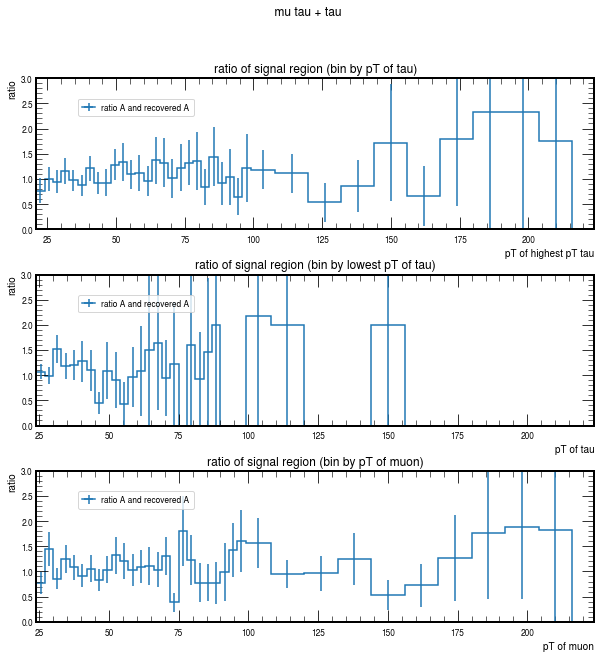

In [2]:
###FOR TTBAR BACKGROUND
####FOR muTAU + TAU
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT])
%matplotlib inline
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu"

samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
file = samples[0][0]
events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)        
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, muon3 = ak.unzip(ak.cartesian([events.SelTau, events.SelMuon], nested=True))
match3 = ak.any(tau3.jetIdx == muon3.jetIdx, axis=-1, mask_identity=False)
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  

events = events[ak.num(events.SelElectron) == 0]
events = events[ak.num(events.SelMuon) == 1]

#events = events[ak.num(events.SelElectron) == 1]
jets = events.Jet[events.Jet.pt > 25.]
bjets = jets[jets.btagDeepFlavB > 0.2770]
one_bjet = ak.num(bjets) == 1
no_bjet = ak.num(bjets) == 0

region_C = events[no_bjet] # no bjet and loose tau ID selection
region_D = events[one_bjet] # one bjet and loose tau ID selection
region_A = events[no_bjet] # no bjet and loose tau ID selection
region_B = events[one_bjet] # one bjet and loose tau ID selection

region_A['SelTau'] = region_A.SelTau[region_A.SelTau.idDeepTau2017v2p1VSjet >= 63]
region_B['SelTau'] = region_B.SelTau[region_B.SelTau.idDeepTau2017v2p1VSjet >= 63]


region_A = region_A[ak.num(region_A.SelTau) >= 2] # no bjet and medium tau ID selection
region_B = region_B[ak.num(region_B.SelTau) >= 2] # one bjet and medium tau ID selection
region_C = region_C[ak.num(region_C.SelTau) >= 2] # no bjet and medium tau ID selection
region_D = region_D[ak.num(region_D.SelTau) >= 2] # one bjet and medium tau ID selection


#####CHECKING if leading tau is fake or true##########################

tau_A1 = region_A.SelTau[:,0]
print(tau_A1.GenPartFlav)








################pT Tau####################################
print("highest pt TAU")
pt_A = region_A.SelTau[:,0].pt
pt_B = region_B.SelTau[:,0].pt
pt_C = region_C.SelTau[:,0].pt
pt_D = region_D.SelTau[:,0].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])



plt.figure(figsize=(10,10))
plt.suptitle(" mu tau + tau")
ax1 = plt.subplot(3,1,1)
plt.subplots_adjust(hspace = 0.3)

hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax1.legend(loc=(0.075,0.75),frameon=True)
ax1.set_ylabel("ratio")
ax1.set_xlabel("pT of highest pT tau")
ax1.set_title("ratio of signal region (bin by pT of tau)")
ax1.set_ylim([0, 3])
ax1.set_xlim([21, 224])





################pT Tau####################################
print("lowest pt Tau")
pt_A = region_A.SelTau[:,1].pt
pt_B = region_B.SelTau[:,1].pt
pt_C = region_C.SelTau[:,1].pt
pt_D = region_D.SelTau[:,1].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(3,1,2)
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel("pT of tau")
ax3.set_ylim([0, 3])
ax3.set_xlim([24, 224])
ax3.set_title("ratio of signal region (bin by lowest pT of tau)")




################pT ELECTRON or muon####################################
print("pt MUON")

pt_A = region_A.SelMuon[:,0].pt
pt_B = region_B.SelMuon[:,0].pt
pt_C = region_C.SelMuon[:,0].pt
pt_D = region_D.SelMuon[:,0].pt
print("----")
print(len(pt_A))
print(len(pt_B))
print(len(pt_C))
print(len(pt_D))
print("----")
bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax2 = plt.subplot(3,1,3)
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax2.legend(loc=(0.075,0.75),frameon=True)
ax2.set_ylabel("ratio")
ax2.set_xlabel("pT of muon")
ax2.set_ylim([0, 3])
ax2.set_xlim([24, 224])
ax2.set_title("ratio of signal region (bin by pT of muon)")






plt.savefig("ratio_ABCD_ttbar_mutau_tau.pdf")
plt.show()


chekcing if the the leading tau is fake or true

In [39]:
###FOR TTBAR BACKGROUND
####FOR muTAU + TAU
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT])
%matplotlib inline
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu"

samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
file = samples[0][0]
events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)        
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, muon3 = ak.unzip(ak.cartesian([events.SelTau, events.SelMuon], nested=True))
match3 = ak.any(tau3.jetIdx == muon3.jetIdx, axis=-1, mask_identity=False)
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  

events = events[ak.num(events.SelElectron) == 0]
events = events[ak.num(events.SelMuon) == 1]
events = events[ak.num(events.SelTau) == 2]

#####CHECKING if leading tau is fake or true##########################
print("leading tau")
lead_tau = events.SelTau[:,0]
print(lead_tau.genPartFlav)
true_leading_tau = lead_tau.genPartFlav == 5
false_leading_tau = lead_tau.genPartFlav != 5

print("subleading tau")
sublead_tau = events.SelTau[:,1]
print(sublead_tau.genPartFlav)
true_subleading_tau = sublead_tau.genPartFlav == 5
false_subleading_tau = sublead_tau.genPartFlav != 5

both_true = true_leading_tau & true_subleading_tau
both_false = false_leading_tau & false_subleading_tau
only_leading_true = true_leading_tau & false_subleading_tau
only_sub_true = false_leading_tau & true_subleading_tau

print("both true taus: " + str(ak.count_nonzero(both_true)))
print("both false taus: " + str(ak.count_nonzero(both_false)))
print("only leading tau true: " + str(ak.count_nonzero(only_leading_true)))
print("only subleading tau true: " + str(ak.count_nonzero(only_sub_true)))



leading tau
[0, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 0, 0, ... 0, 5, 0, 5, 0, 5, 5, 0, 5, 0, 1, 5, 5]
subleading tau
[3, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 5, ... 5, 0, 5, 0, 5, 0, 0, 5, 0, 5, 0, 0, 0]
both true taus: 424
both false taus: 4470
only leading tau true: 17360
only subleading tau true: 8487


FOR E TAU TAU

C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


[[Electron, Muon, Muon], [Muon, Muon], ... [Muon, Tau], [Electron, Muon, Tau]]
[]
[<event 1:147309:147308381>, ... <event 1:141790:141789110>]
[<event 1:85390:85389779>, <event 1:57114:57113339>, <event 1:54946:54945536>]
[<event 1:49143:49142694>, <event 1:102054:102053247>, ... <event 1:76280:76279708>]
highest pt TAU
lowest pt Tau
pt electron
----
0
3
3
28
----


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:9

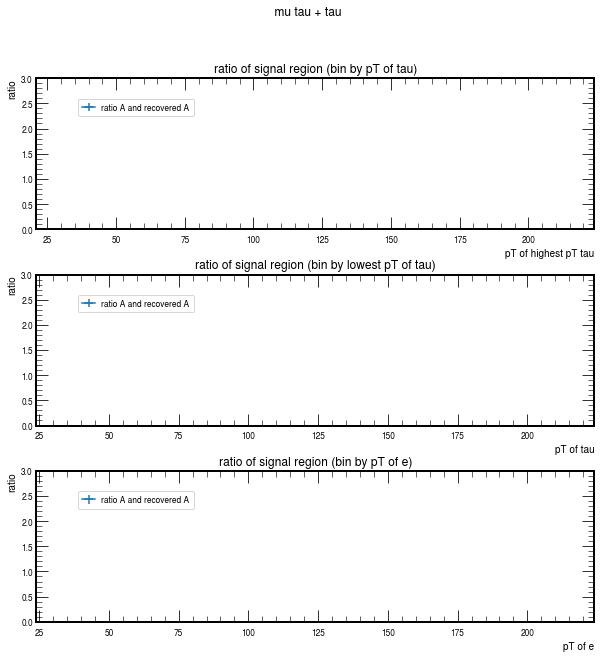

In [7]:
###FOR TTBAR BACKGROUND
####FOR muTAU + TAU
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT])
%matplotlib inline
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu"

samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
file = samples[0][0]
events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)        
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, muon3 = ak.unzip(ak.cartesian([events.SelTau, events.SelMuon], nested=True))
match3 = ak.any(tau3.jetIdx == muon3.jetIdx, axis=-1, mask_identity=False)
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  
events["SelLepton"] = ak.concatenate([events.SelElectron, events.SelMuon, events.SelTau], axis = -1)
print(events.SelLepton)
events = events[ak.num(events.SelElectron) == 1]
events = events[ak.num(events.SelMuon) == 0]
jets = events.Jet[events.Jet.pt > 25.]
bjets = jets[jets.btagDeepFlavB > 0.2770]
one_bjet = ak.num(bjets) == 1
no_bjet = ak.num(bjets) == 0

region_C = events[no_bjet] # no bjet and loose tau ID selection
region_D = events[one_bjet] # one bjet and loose tau ID selection
region_A = events[no_bjet] # no bjet and medium tau ID selection
region_B = events[one_bjet] # one bjet and medium tau ID selection

region_A['SelTau'] = region_A.SelTau[region_A.SelTau.idDeepTau2017v2p1VSjet >= 63]
region_B['SelTau'] = region_B.SelTau[region_B.SelTau.idDeepTau2017v2p1VSjet >= 63]


region_A = region_A[ak.num(region_A.SelTau) >= 2] 
region_B = region_B[ak.num(region_B.SelTau) >= 2] 
region_C = region_C[ak.num(region_C.SelTau) >= 2] 
region_D = region_D[ak.num(region_D.SelTau) >= 2] 
print(region_A)
print(region_B)
print(region_C)
print(region_D)

################pT Tau####################################
print("highest pt TAU")
pt_A = region_A.SelTau[:,0].pt
pt_B = region_B.SelTau[:,0].pt
pt_C = region_C.SelTau[:,0].pt
pt_D = region_D.SelTau[:,0].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])



plt.figure(figsize=(10,10))
plt.suptitle(" mu tau + tau")
ax1 = plt.subplot(3,1,1)
plt.subplots_adjust(hspace = 0.3)

hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax1.legend(loc=(0.075,0.75),frameon=True)
ax1.set_ylabel("ratio")
ax1.set_xlabel("pT of highest pT tau")
ax1.set_title("ratio of signal region (bin by pT of tau)")
ax1.set_ylim([0, 3])
ax1.set_xlim([21, 224])





################pT Tau####################################
print("lowest pt Tau")
pt_A = region_A.SelTau[:,1].pt
pt_B = region_B.SelTau[:,1].pt
pt_C = region_C.SelTau[:,1].pt
pt_D = region_D.SelTau[:,1].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(3,1,2)
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel("pT of tau")
ax3.set_ylim([0, 3])
ax3.set_xlim([24, 224])
ax3.set_title("ratio of signal region (bin by lowest pT of tau)")




################pT ELECTRON or muon####################################
print("pt electron")

pt_A = region_A.SelElectron[:,0].pt
pt_B = region_B.SelElectron[:,0].pt
pt_C = region_C.SelElectron[:,0].pt
pt_D = region_D.SelElectron[:,0].pt
print("----")
print(len(pt_A))
print(len(pt_B))
print(len(pt_C))
print(len(pt_D))
print("----")

bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax2 = plt.subplot(3,1,3)
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A and recovered A')
ax2.legend(loc=(0.075,0.75),frameon=True)
ax2.set_ylabel("ratio")
ax2.set_xlabel("pT of e")
ax2.set_ylim([0, 3])
ax2.set_xlim([24, 224])
ax2.set_title("ratio of signal region (bin by pT of e)")






plt.savefig("ratio_ABCD_ttbar_etau_tau.pdf")
plt.show()


validation on emu tau

C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  RuntimeWarning,
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\coffea\nanoevents\schemas\nanoaod.py:195: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  RuntimeWarning,


pt TAU
pt ELECTRON
----
12311
11582
39652
38046
----
pt MUON


C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:163: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:165: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.py:167: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lucas\miniconda3\envs\env_conda\envs\PDM\lib\site-packages\ipykernel_launcher.p

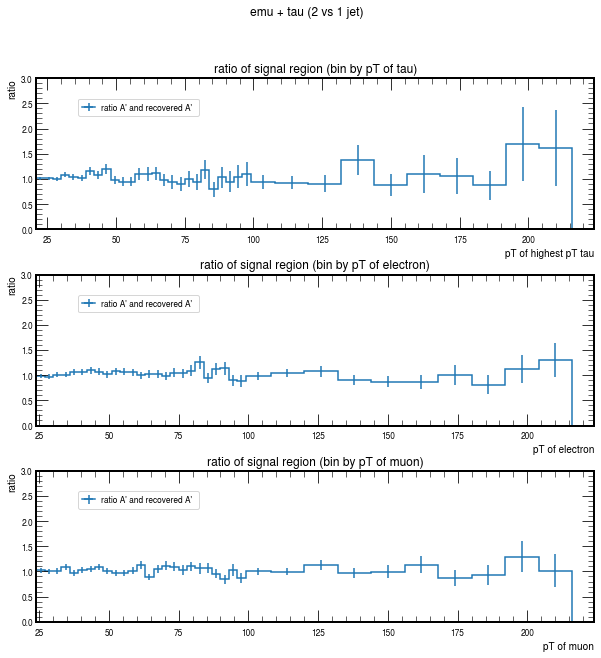

In [8]:
###FOR TTBAR BACKGROUND
####FOR EMU + TAU
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT])
%matplotlib inline
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\backgrounds\\tt2l2nu"

samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
file = samples[0][0]
events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
events['SelElectron'] = events.Electron[(events.Electron.pt > 24.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)        
events['SelMuon'] = events.SelMuon[(~(match1))]    
events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (abs(events.Tau.eta) < 2.3)& (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
tau3, muon3 = ak.unzip(ak.cartesian([events.SelTau, events.SelMuon], nested=True))
match3 = ak.any(tau3.jetIdx == muon3.jetIdx, axis=-1, mask_identity=False)
events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]  

events = events[ak.num(events.SelMuon) == 1]
events = events[ak.num(events.SelElectron) == 1]
jets = events.Jet[events.Jet.pt > 25.]
bjets = jets[jets.btagDeepFlavB > 0.2770]
one_bjet = ak.num(bjets) == 1
no_bjet = ak.num(bjets) == 0
two_bjet = ak.num(bjets) == 2

region_C = events[one_bjet] # no bjet and loose tau ID selection
region_D = events[two_bjet] # one bjet and loose tau ID selection
region_A = events[one_bjet] # no bjet and loose tau ID selection
region_B = events[two_bjet] # one bjet and loose tau ID selection

region_A['SelTau'] = region_A.SelTau[region_A.SelTau.idDeepTau2017v2p1VSjet >= 63]
region_B['SelTau'] = region_B.SelTau[region_B.SelTau.idDeepTau2017v2p1VSjet >= 63]


region_A = region_A[ak.num(region_A.SelTau) >= 1] # no bjet and medium tau ID selection
region_B = region_B[ak.num(region_B.SelTau) >= 1] # one bjet and medium tau ID selection
region_C = region_C[ak.num(region_C.SelTau) >= 1] # no bjet and medium tau ID selection
region_D = region_D[ak.num(region_D.SelTau) >= 1] # one bjet and medium tau ID selection

################pT Tau####################################
print("pt TAU")
pt_A = region_A.SelTau[:,0].pt
pt_B = region_B.SelTau[:,0].pt
pt_C = region_C.SelTau[:,0].pt
pt_D = region_D.SelTau[:,0].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])



plt.figure(figsize=(10,10))
plt.suptitle("emu + tau (2 vs 1 jet)")
ax1 = plt.subplot(3,1,1)
plt.subplots_adjust(hspace = 0.3)

hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A\' and recovered A\' ')
ax1.legend(loc=(0.075,0.75),frameon=True)
ax1.set_ylabel("ratio")
ax1.set_xlabel("pT of highest pT tau")
ax1.set_title("ratio of signal region (bin by pT of tau)")
ax1.set_ylim([0, 3])
ax1.set_xlim([21, 224])


################pT ELECTRON####################################
print("pt ELECTRON")
pt_A = region_A.SelElectron[:,0].pt
pt_B = region_B.SelElectron[:,0].pt
pt_C = region_C.SelElectron[:,0].pt
pt_D = region_D.SelElectron[:,0].pt
print("----")
print(len(pt_A))
print(len(pt_B))
print(len(pt_C))
print(len(pt_D))
print("----")
bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax2 = plt.subplot(3,1,2)
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A\' and recovered A\' ')
ax2.legend(loc=(0.075,0.75),frameon=True)
ax2.set_ylabel("ratio")
ax2.set_xlabel("pT of electron")
ax2.set_ylim([0, 3])
ax2.set_xlim([24, 224])
ax2.set_title("ratio of signal region (bin by pT of electron)")




################pT MUON####################################
print("pt MUON")
pt_A = region_A.SelMuon[:,0].pt
pt_B = region_B.SelMuon[:,0].pt
pt_C = region_C.SelMuon[:,0].pt
pt_D = region_D.SelMuon[:,0].pt


bins = []
width = 3
for i in range(20,100):
    if(i%width == 0):
        bins.append(i)
for i in range(100,220):
    if(i%(width*4) == 0):
        bins.append(i)
(h_A,bins_A) = np.histogram(pt_A, bins = bins)
(h_B,bins_B) = np.histogram(pt_B, bins = bins)
(h_C,bins_C) = np.histogram(pt_C, bins = bins)
(h_D,bins_D) = np.histogram(pt_D, bins = bins)



h_ratio_D_over_B = np.divide(h_D,h_B)
h_ratio_D_over_B = np.nan_to_num(h_ratio_D_over_B, nan=0, posinf=0, neginf=0)



h_ratio_C_over_A = np.divide(h_C,h_A)
h_ratio_C_over_A = np.nan_to_num(h_ratio_C_over_A, nan=0, posinf=0, neginf=0)
h_recovered_A =  np.divide(h_C,h_ratio_D_over_B)
h_recovered_A = np.nan_to_num(h_recovered_A, nan=0, posinf=0, neginf=0)




###RATIO OF THE TWO #######
error_A = np.sqrt(h_A)
error_recovered_A = np.sqrt(h_recovered_A)
h_ratio_A_recovered_A = np.divide(h_A,h_recovered_A)
h_ratio_A_recovered_A = np.nan_to_num(h_ratio_A_recovered_A, nan=0, posinf=0, neginf=0)
temp1 = np.divide(error_A,h_A)**2
temp1 = np.nan_to_num(temp1, nan=0, posinf=0, neginf=0)
temp2 = np.divide(error_recovered_A,h_recovered_A)**2
temp2 = np.nan_to_num(temp2, nan=0, posinf=0, neginf=0)
temp = np.sqrt( temp1+ temp2)
error_ratio_A_recovered_A = np.multiply(temp,h_ratio_A_recovered_A)
for i in range(0,len(error_ratio_A_recovered_A)):
    error_ratio_A_recovered_A[i] = min(error_ratio_A_recovered_A[i], h_ratio_A_recovered_A[i])




ax3 = plt.subplot(3,1,3)
hep.histplot(h_ratio_A_recovered_A, bins, yerr = error_ratio_A_recovered_A, label = 'ratio A\' and recovered A\' ')
ax3.legend(loc=(0.075,0.75),frameon=True)
ax3.set_ylabel("ratio")
ax3.set_xlabel("pT of muon")
ax3.set_ylim([0, 3])
ax3.set_xlim([24, 224])
ax3.set_title("ratio of signal region (bin by pT of muon)")
plt.savefig("ratio_ABCD_ttbar_emu_tau_two_vs_one_jet.pdf")
plt.show()
